### E-mail/ SMS spam Classifier

In [1]:
import numpy as np
import pandas as pd     

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [4]:
# Dropping last 3 colums
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [5]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample()

,target,text
4194,spam,Double mins and txts 4 6months FREE Bluetooth ...


In [6]:
# label encoding the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['target']=encoder.fit_transform(df['target'])

In [8]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# check for duplicate values
df.duplicated().sum()

403

In [11]:
# Removing duplicated values
df= df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

### 2. EDA
 Exploratory data analysis

In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

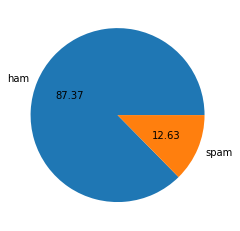

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [15]:
# Data is imbalanced

In [16]:
# word analysis 
import nltk

In [32]:
# import ssl

# nltk.download()
# nltk.download('punkt')
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\manish
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_characters']= df['text'].apply(len)

In [19]:
# num of words
df['num_word']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [20]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [92]:
import seaborn as sns


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

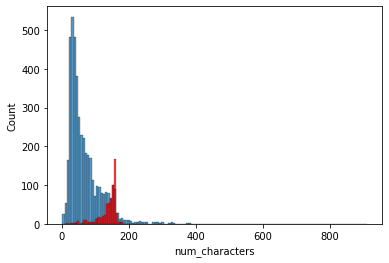

In [ ]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_word', ylabel='Count'>

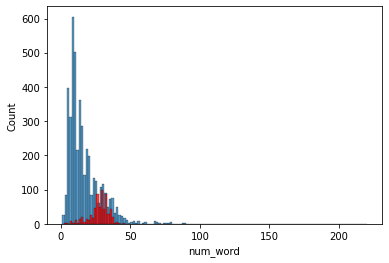

In [ ]:
sns.histplot(df[df['target']==0]['num_word'])
sns.histplot(df[df['target']==1]['num_word'],color='red')

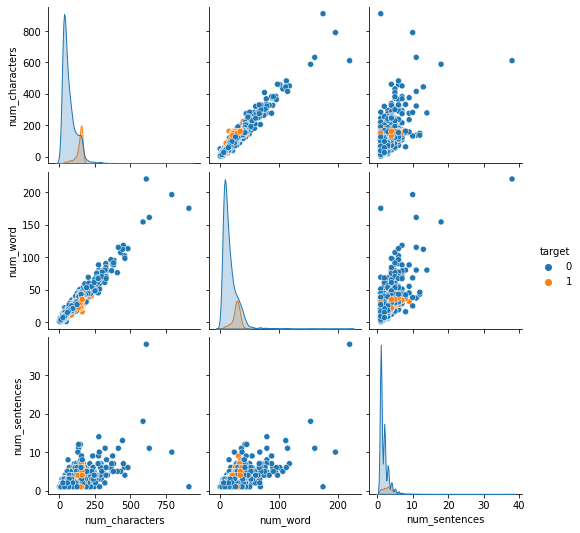

In [ ]:
sns.pairplot(df,hue='target')

C:\Users\manish kumar\AppData\Local\Temp\ipykernel_8656\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

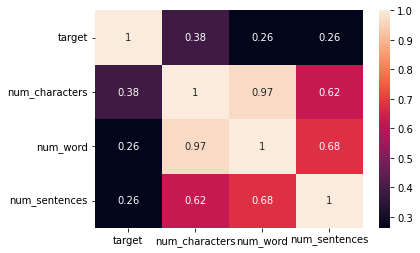

In [ ]:
sns.heatmap(df.corr(),annot=True)

### 3. Data preprocessing

* Lower Case
* Tokenization
* removing special characteres
* Removing stop words and punctuation
* Stemming

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\manish
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords
import string

In [40]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [113]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
     
    y= []
    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [114]:
transform_text('dsf dfjdsk f %% dancing % ')

'dsf dfjdsk f danc'

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [131]:
df['transformed_text'].shape

(5169,)

In [115]:
df.head()

,target,text,num_characters,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [75]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [117]:
wd= df[df['target'] == 1]['transformed_text']
tem = " "
for i in wd :
    for j in i :
        tem+=j+" "
tem= tem.strip()
spam_wc = wc.generate(tem)
# wd

TypeError: Cannot use .str.cat with values of inferred dtype 'mixed'.

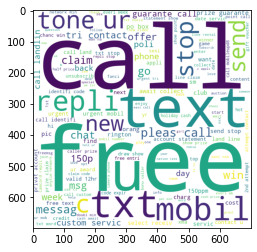

In [78]:
# spam words
plt.imshow(spam_wc)

In [79]:
wd= df[df['target'] == 0]['transformed_text']
tem = " "
for i in wd :
    for j in i :
        tem+=j+" "
tem= tem.strip()
spam_wc = wc.generate(tem)
# wd

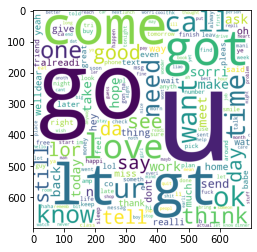

In [81]:
# ham words
plt.imshow(spam_wc)

In [104]:
spam_corpus= []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg:
    # print(msg)
        spam_corpus.append(word)


In [105]:
len (spam_corpus)

9939

In [106]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_courpus).most_common(30)),hue="0")
# # pd.DataFrame(Counter(spam_courpus).most_common(30))

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [189]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tidf= TfidfVectorizer(max_features=3000)

In [190]:
# df['transformed_text'][0][0]

alwords =[]
for i in  df['transformed_text']:
    alwords.append(' '.join(i))
    # print(i)
#     # for j in i :
#     # alwords.append(i)
# print(alwords)
X= tidf.fit_transform(alwords).toarray()
# X= cv.fit_transform(df['transformed_text']).toarray()

In [164]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
X.shape

(5169, 6708)

In [148]:
y= df['target'].values

In [126]:
y.shape

(5169,)

In [169]:
from sklearn.model_selection import train_test_split

In [191]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [192]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix , precision_score

In [172]:
gnb= GaussianNB()
mnb = MultinomialNB()
bnb= BernoulliNB()

In [173]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [193]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [175]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### will keep tfidf with mnb

In [176]:
# Trying all algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [177]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [178]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [179]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [180]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [195]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9333333333333333


In [196]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [197]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.967118,0.933333
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [198]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [199]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.967118
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


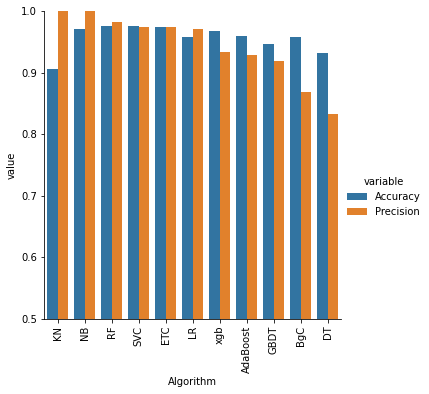

In [200]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [203]:
import pickle
pickle.dump(tidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))